In [ ]:
# do this section in the `scanpy_2` env

In [ ]:
import swan_vis as swan
import anndata

sg = swan.read('swan_modelad.p')

In [38]:
def write_adata_from_swan(sg, how, ofile):
    
    if how == 'iso':
        adata = sg.adata.copy()
    elif how == 'gene':
        adata = sg.gene_adata.copy()

    # remove categoricals
    for col in adata.obs.columns:
        if adata.obs[col].dtype.name == 'category':
            adata.obs[col] = adata.obs[col].astype(str)

    # drop cols w/ nans
    adata.obs.drop(['age', 'adult'], axis=1, inplace=True)
    obs = adata.obs.copy(deep=True)
    var = adata.var.copy(deep=True)
    X = adata.X
    adata = anndata.AnnData(obs=obs, var=var, X=X)

    adata.write(ofile)

In [39]:
write_adata_from_swan(sg, 'iso', 'temp_iso_anndata.h5ad')
write_adata_from_swan(sg, 'gene', 'temp_gene_anndata.h5ad')

In [ ]:
# do this section in the `pydeseq2 env`

In [12]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import numpy as np
import scanpy as sc
import pandas as pd

In [6]:
def de(adata):
    
    obs_col = 'genotype'
    
    # adata = sg.adata
    threads = 8
    
    # densify matrix
    adata.X = np.array(adata.X.todense())
    
    # run test
    dds = DeseqDataSet(adata=adata,
                   design_factors=obs_col,
                   n_cpus=threads,
                   refit_cooks=True)
    dds.deseq2()
    stat_res = DeseqStats(dds,
                          n_cpus=threads)
    
    stat_res.summary()
    
    df = stat_res.results_df
    return df

In [7]:
# transcript level
adata = sc.read('temp_iso_anndata.h5ad')
df = de(adata)
df.to_csv('de_transcripts.tsv', sep='\t')

Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 81.58 seconds.

Fitting dispersion trend curve...
... done in 33.39 seconds.

Fitting MAP dispersions...
... done in 56.89 seconds.

Fitting LFCs...
... done in 13.48 seconds.

Refitting 622 outliers.

Fitting dispersions...
... done in 0.29 seconds.

Fitting MAP dispersions...
... done in 0.41 seconds.

Fitting LFCs...
... done in 0.12 seconds.

Running Wald tests...
... done in 5.16 seconds.

Log2 fold change & Wald test p-value: genotype b6n vs 5xfad


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
tid,,,,,,
"ENSMUSG00000102693[1,1,1]",0.106201,0.472874,2.877985,0.164308,0.869489,NaN
"ENSMUSG00000051951[2,2,3]",0.397847,1.026180,1.341721,0.764823,0.444377,NaN
"ENSMUSG00000103377[1,1,1]",0.180659,-0.473134,2.152735,-0.219783,0.826040,NaN
"ENSMUSG00000104017[1,1,1]",0.102621,-0.368333,3.250888,-0.113302,0.909791,NaN
"ENSMUSG00000103201[1,1,1]",0.060040,-0.007662,3.288666,-0.002330,0.998141,NaN
...,...,...,...,...,...,...
"ENCODEMG000120544[1,1,1]",2.357220,0.478350,1.095807,0.436528,0.662454,0.959572
"ENCODEMG000127906[1,1,1]",0.063740,0.232786,3.265955,0.071277,0.943178,NaN
"ENCODEMG000127957[1,1,1]",0.045699,0.593457,3.313975,0.179077,0.857877,NaN


<Axes: xlabel='log2FoldChange', ylabel='sig'>

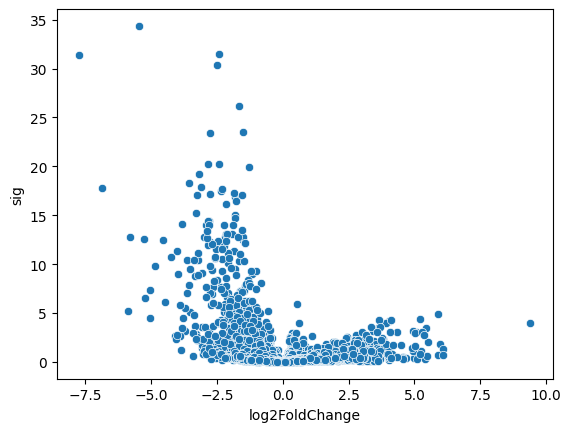

In [9]:
import seaborn as sns
df['sig'] = -1*np.log10(df.padj)
sns.scatterplot(df, x='log2FoldChange', y='sig')

In [8]:
# gene level
adata = sc.read('temp_gene_anndata.h5ad')
df = de(adata)
df.to_csv('de_genes.tsv', sep='\t')

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 25.53 seconds.

Fitting dispersion trend curve...
... done in 10.15 seconds.

Fitting MAP dispersions...
... done in 20.10 seconds.

Fitting LFCs...
... done in 3.20 seconds.

Refitting 130 outliers.

Fitting dispersions...
... done in 0.14 seconds.

Fitting MAP dispersions...
... done in 0.14 seconds.

Fitting LFCs...
... done in 0.07 seconds.

Running Wald tests...
... done in 1.62 seconds.

Log2 fold change & Wald test p-value: genotype b6n vs 5xfad


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gid,,,,,,
ENSMUSG00000000001.4,159.065231,-0.298807,0.197783,-1.510787,0.130843,0.562475
ENSMUSG00000000028.15,10.422614,-0.012943,0.228589,-0.056619,0.954849,0.990312
ENSMUSG00000000037.16,0.893651,0.255600,0.830903,0.307617,0.758374,0.950345
ENSMUSG00000000049.11,1.993689,-0.201177,0.579751,-0.347006,0.728586,0.944172
ENSMUSG00000000056.7,164.381012,-0.176284,0.277667,-0.634875,0.525510,0.879337
...,...,...,...,...,...,...
ENSMUSG00000118380.1,0.283367,-0.898093,1.689212,-0.531664,0.594959,NaN
ENSMUSG00000118382.1,0.176526,0.812347,3.014181,0.269508,0.787538,NaN
ENSMUSG00000118383.1,4.000425,-0.201153,0.465536,-0.432090,0.665676,0.924363


<Axes: xlabel='log2FoldChange', ylabel='sig'>

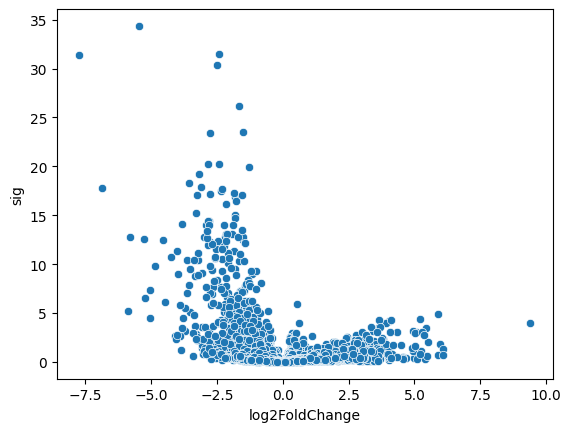

In [10]:
import seaborn as sns
df['sig'] = -1*np.log10(df.padj)
sns.scatterplot(df, x='log2FoldChange', y='sig')

In [25]:
# how many de events do we find in each?
df = pd.read_csv('de_transcripts.tsv', sep='\t')
print(len(df.index))
df.head()

103153


,tid,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,"ENSMUSG00000102693[1,1,1]",0.106201,0.472874,2.877985,0.164308,0.869489,NaN
1,"ENSMUSG00000051951[2,2,3]",0.397847,1.026180,1.341721,0.764823,0.444377,NaN
2,"ENSMUSG00000103377[1,1,1]",0.180659,-0.473134,2.152735,-0.219783,0.826040,NaN
3,"ENSMUSG00000104017[1,1,1]",0.102621,-0.368333,3.250888,-0.113302,0.909791,NaN
4,"ENSMUSG00000103201[1,1,1]",0.060040,-0.007662,3.288666,-0.002330,0.998141,NaN


In [25]:
# print(len(df.loc[df.padj.isnull()]))
# print(len(df.loc[~df.padj.isnull()]))

In [28]:
temp = df.loc[(df.log2FoldChange.abs()>0.5)&(df.padj<=0.05)]
print(len(temp.index))

520


In [24]:
df = pd.read_csv('de_genes.tsv', sep='\t')
print(len(df.index))
df.head()
temp = df.loc[(df.log2FoldChange.abs()>0.5)&(df.padj<=0.05)]
print(len(temp.index))

27268
545
